<a href="https://colab.research.google.com/github/Sabasik/IDS-2020/blob/master/IDS2020projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project D-19: Kaggle World Happiness Report**


Kadi Sammul, Ellen Leib, Robert Leht

## **Introduction**

Everyone wants to be happy. There are so many factors that have an effect on people's happiness, like their health, wealth and family. We will attempt to predict the results of this year's happiness scores and will also try to find the biggest contributor to a nation's people's happiness. With the number of daily Internet users growing each year, we also tried to see if there might be a correlation between happiness and the amount of Internet they consume.

### Feature definitions

**Happiness score**- It is the national average response to the question of life evaluations. The English wording of the question is “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this
time?”

**GDP per capita** - gross domestic product per capita at purchasing power parity.

**Healthy Life Expectancy** - measures the number of remaining years that a person of a certain age is expected to live without disability.

**Social support** - national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

**Freedom** - national average of responses to the question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

**Generosity** - residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.

**Corruption Perception** - the measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout
the government or not” and “Is corruption widespread within businesses or not?”

## **Data Cleaning**

First, let's import some libraries we're going to need from the start.

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

Let's read in the data from Kaggle's dataset of World Happiness up to 2020. Some data cleaning will have to be done early on in order to use it.


In [ ]:
try2015 = pd.read_csv('2015.csv')
try2016 = pd.read_csv('2016.csv')
try2017 = pd.read_csv('2017.csv')
try2018 = pd.read_csv('2018.csv')
try2019 = pd.read_csv('2019.csv')
try2020 = pd.read_csv('2020.csv')

These following code blocks are necessary to standardize the data we have.

In [ ]:
try2015 = try2015.drop(columns=["Standard Error", "Region", 'Dystopia Residual'])
try2015 = try2015.rename(columns={"Family" : "Social support"})
try2015.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [ ]:
try2016 = try2016.drop(columns=["Lower Confidence Interval", "Upper Confidence Interval", "Region", 'Dystopia Residual'])
try2016 = try2016.rename(columns={"Family" : "Social support"})

In [ ]:
try2016.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [ ]:
try2017 = try2017.rename(columns={"Happiness.Rank" : "Happiness Rank",
                        "Family" : "Social support",
                        "Happiness.Score" : "Happiness Score",
                        "Economy..GDP.per.Capita." : "Economy (GDP per Capita)",
                        "Health..Life.Expectancy." : "Health (Life Expectancy)",
                        "Trust..Government.Corruption." : "Trust (Government Corruption)",
                        "Dystopia.Residual" : "Dystopia Residual"})
try2017 = try2017.drop(columns=["Whisker.high", "Whisker.low", 'Dystopia Residual'])
try2017.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)'],
      dtype='object')

In [ ]:
try2018 = try2018.rename(columns={"Overall rank" : "Happiness Rank",
                        "Country or region" : "Country",
                        "Score" : "Happiness Score",
                        "GDP per capita" : "Economy (GDP per Capita)",
                        "Healthy life expectancy" : "Health (Life Expectancy)",
                        "Perceptions of corruption" : "Trust (Government Corruption)",
                        "Freedom to make life choices" : "Freedom"})
try2018.columns

Index(['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)'],
      dtype='object')

In [ ]:
try2019 = try2019.rename(columns={"Overall rank" : "Happiness Rank",
                        "Country or region" : "Country",
                        "Score" : "Happiness Score",
                        "GDP per capita" : "Economy (GDP per Capita)",
                        "Healthy life expectancy" : "Health (Life Expectancy)",
                        "Perceptions of corruption" : "Trust (Government Corruption)",
                        "Freedom to make life choices" : "Freedom"})
try2019.columns

Index(['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)'],
      dtype='object')

In [ ]:
try2020.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
try2020 = try2020.drop(columns=["Standard error of ladder score", 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual', 'Regional indicator'])

try2020 = try2020.rename(columns={"Overall rank" : "Happiness Rank",
                        "Country name" : "Country",
                        "Ladder score" : "Happiness Score",
                        "Explained by: Log GDP per capita" : "Economy (GDP per Capita)",
                        "Explained by: Healthy life expectancy" : "Health (Life Expectancy)",
                        "Explained by: Perceptions of corruption" : "Trust (Government Corruption)",
                        "Explained by: Freedom to make life choices" : "Freedom",
                        "Explained by: Generosity" : "Generosity",
                        'Explained by: Social support' : "Social support"})

try2020.columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Social support', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)'],
      dtype='object')

In [ ]:
koik = []
for col in try2015.columns:
  if col not in koik:
    koik.append(col)
for col in try2016.columns:
  if col not in koik:
    koik.append(col)
for col in try2017.columns:
  if col not in koik:
    koik.append(col)
for col in try2018.columns:
  if col not in koik:
    koik.append(col)
for col in try2019.columns:
  if col not in koik:
    koik.append(col)
for col in try2020.columns:
  if col not in koik:
    koik.append(col)
koik

['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Social support',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity']

Let's see what kind of differences we have in column names and which column names only appear in one table.

In [ ]:
# mis on mingi aasta omas olemas, aga selles mitte
print("2015:", np.setdiff1d(koik,try2015.columns))
print("2016:", np.setdiff1d(koik,try2016.columns))
print("2017:", np.setdiff1d(koik,try2017.columns))
print("2018:", np.setdiff1d(koik,try2018.columns))
print("2019:", np.setdiff1d(koik,try2019.columns))
print("2020:", np.setdiff1d(koik,try2020.columns))

2015: []
2016: []
2017: []
2018: []
2019: []
2020: ['Happiness Rank']


Now the column names are the same for each of tables and we can add the data to a bigger dataframe.

In [ ]:
data = pd.DataFrame(columns=(koik + ["Year"]))

In [ ]:
try2015["Year"] = 2015
try2016["Year"] = 2016
try2017["Year"] = 2017
try2018["Year"] = 2018
try2019["Year"] = 2019
try2020["Year"] = 2020
data = data.append([try2015, try2016, try2017, try2018, try2019]).sort_values(by=['Happiness Score'], ascending=False)

data = data.replace([np.inf, -np.inf], np.nan)
#data = data.fillna(0)

In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_rows', 10)

data.sort_values(by="Country")

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
140,Afghanistan,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
144,Afghanistan,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
152,Afghanistan,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
153,Afghanistan,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
153,Afghanistan,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
...,...,...,...,...,...,...,...,...,...,...
114,Zimbabwe,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2015
145,Zimbabwe,146,3.663,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000,2019
143,Zimbabwe,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,2018
137,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,2017


In [ ]:
try2018

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


## Data Visualization

Let's visualise all the happiness ranks we have so far.

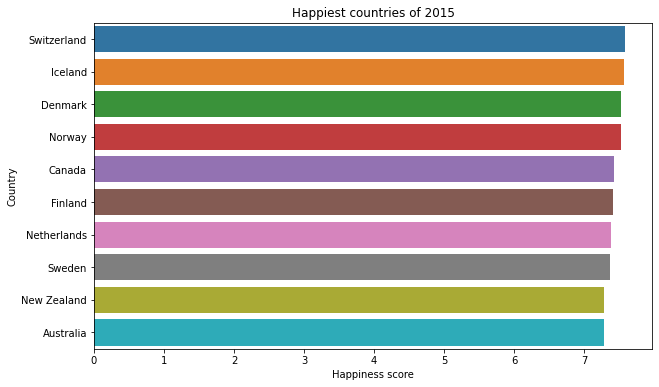

In [ ]:
Happiness2015 = try2015.sort_values(by='Happiness Score', ascending=False)[:10]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness2015.Country, x=Happiness2015["Happiness Score"])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Happiest countries of 2015')
plt.show()

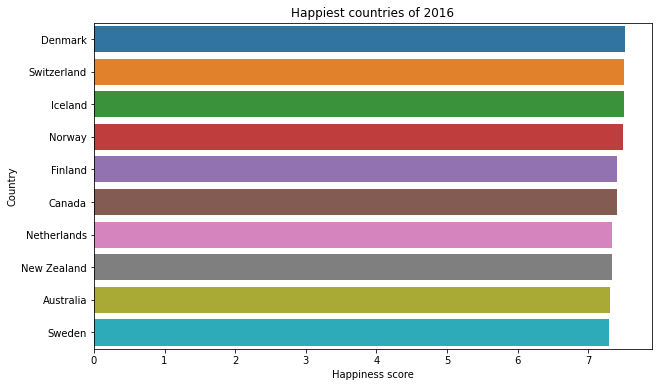

In [ ]:
Happiness2016 = try2016.sort_values(by='Happiness Score', ascending=False)[:10]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness2016.Country, x=Happiness2016["Happiness Score"])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Happiest countries of 2016')
plt.show()

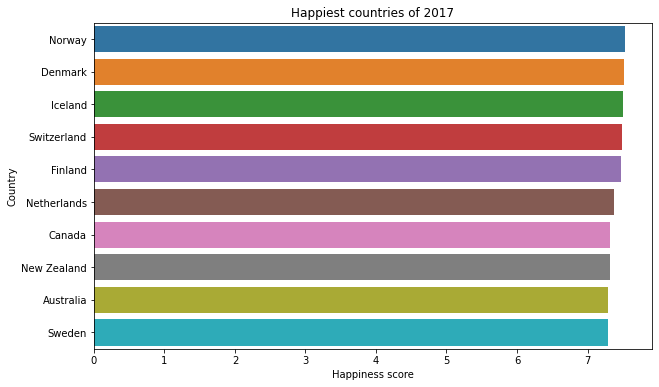

In [ ]:
Happiness2017 = try2017.sort_values(by='Happiness Score', ascending=False)[:10]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness2017.Country, x=Happiness2017["Happiness Score"])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Happiest countries of 2017')
plt.show()

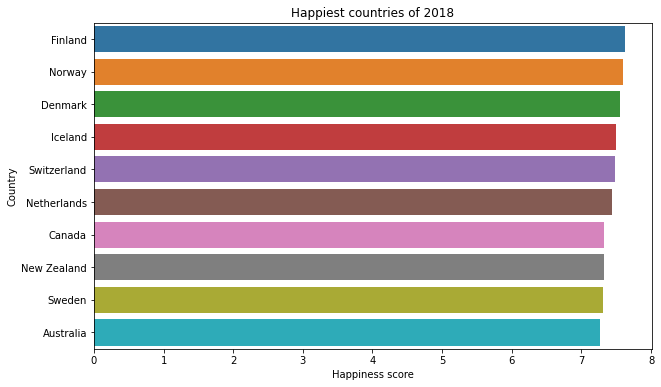

In [ ]:
Happiness2018 = try2018.sort_values(by='Happiness Score', ascending=False)[:10]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness2018.Country, x=Happiness2018["Happiness Score"])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Happiest countries of 2018')
plt.show()

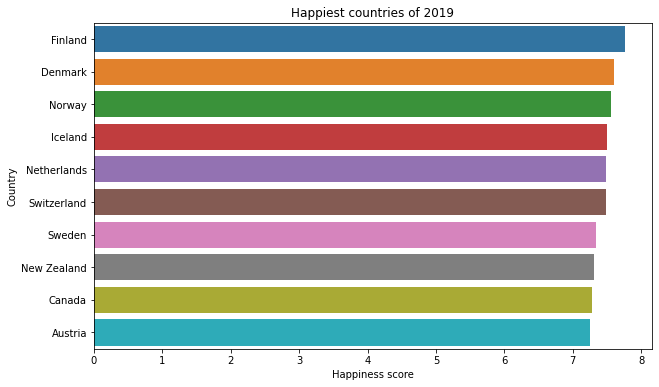

In [ ]:
Happiness2019 = try2019.sort_values(by='Happiness Score', ascending=False)[:10]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness2019.Country, x=Happiness2019["Happiness Score"])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Happiest countries of 2019')
plt.show()

We can see that the top 10 in happiest countries does not change too much. Perhaps we can later find a correlation with a feature, as to understand why that is so.

Let's make a dataset of all the countries and their happiness score over the years. We will also add an extra column to show the change from year 2015 to 2020.

In [ ]:
data_all=data.append(try2020)

#Changing all the different variations of one name so they would be the same for each country
data_all["Country"]=data_all["Country"].replace("Hong Kong S.A.R. of China", "Hong Kong")
data_all["Country"]=data_all["Country"].replace("Hong Kong S.A.R., China", "Hong Kong")
data_all["Country"]=data_all["Country"].replace("North Cyprus", "Northern Cyprus")
data_all["Country"]=data_all["Country"].replace("North Macedonia", "Macedonia")
data_all["Country"]=data_all["Country"].replace("Taiwan Province of China", "Taiwan")
data_all["Country"]=data_all["Country"].replace("Trinidad & Tobago", "Trinidad and Tobago")


index_names = data_all[ (data_all['Country'] == "Somaliland Region") | (data_all['Country'] == "Somaliland region")].index 
data_all.drop(index_names, inplace = True) 
  
data_all.Country.sort_values()

152    Afghanistan
153    Afghanistan
153    Afghanistan
144    Afghanistan
140    Afghanistan
          ...     
130       Zimbabwe
137       Zimbabwe
150       Zimbabwe
114       Zimbabwe
145       Zimbabwe
Name: Country, Length: 923, dtype: object

In [ ]:
all_countries=set(data_all.Country.tolist())
by_countries=dict()
for country in all_countries:
    by_countries[country]=[]
    for year in range(2015,2021):
       
        if len(data_all[(data_all.Country==country) & (data_all.Year==year)]["Happiness Score"]) !=0:
            score=data_all[(data_all.Country==country) & (data_all.Year==year)]["Happiness Score"].iloc[0]
        else:
            score=np.nan
        by_countries[country].append(score)

df_by_countries=pd.DataFrame.from_dict(by_countries, orient='index', columns=["2015","2016","2017","2018","2019","2020"])
df_by_countries["Country"]=df_by_countries.index.values
df_by_countries["Change 2015-2020"]=df_by_countries["2020"]-df_by_countries["2015"]
df_by_countries

,2015,2016,2017,2018,2019,2020,Country,Change 2015-2020
Chile,6.670,6.705,6.652,6.476,6.444,6.2285,Chile,-0.4415
Czech Republic,6.505,6.596,6.609,6.711,6.852,6.9109,Czech Republic,0.4059
Lithuania,5.833,5.813,5.902,5.952,6.149,6.2155,Lithuania,0.3825
Belize,NaN,5.956,5.956,5.956,NaN,NaN,Belize,NaN
Paraguay,5.878,5.538,5.493,5.681,5.743,5.6921,Paraguay,-0.1859
...,...,...,...,...,...,...,...,...
Niger,3.845,3.856,4.028,4.166,4.628,4.9096,Niger,1.0646
Ukraine,4.681,4.324,4.096,4.103,4.332,4.5607,Ukraine,-0.1203
Romania,5.124,5.528,5.825,5.945,6.070,6.1237,Romania,0.9997
Mexico,7.187,6.778,6.578,6.488,6.595,6.4650,Mexico,-0.7220


Here we'll illustrate the biggest changes from year 2015 to 2020 (improvements and also declines).

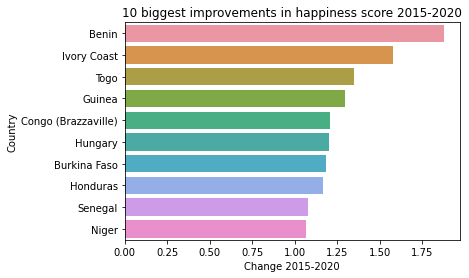

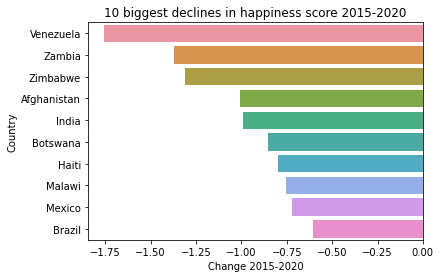

In [ ]:

sns.set_palette("RdBu")
sns.barplot(data=df_by_countries.sort_values(by="Change 2015-2020", ascending=False)[:10],y="Country",x="Change 2015-2020",orient="h")

plt.title("10 biggest improvements in happiness score 2015-2020")
plt.show()

sns.barplot(data=df_by_countries.sort_values(by="Change 2015-2020", ascending=True)[:10],y="Country",x="Change 2015-2020",orient="h")
plt.title("10 biggest declines in happiness score 2015-2020")
plt.show()

Here are plots for all the countries in the dataset tha show the values of the happiness score over the years 2015-2020.

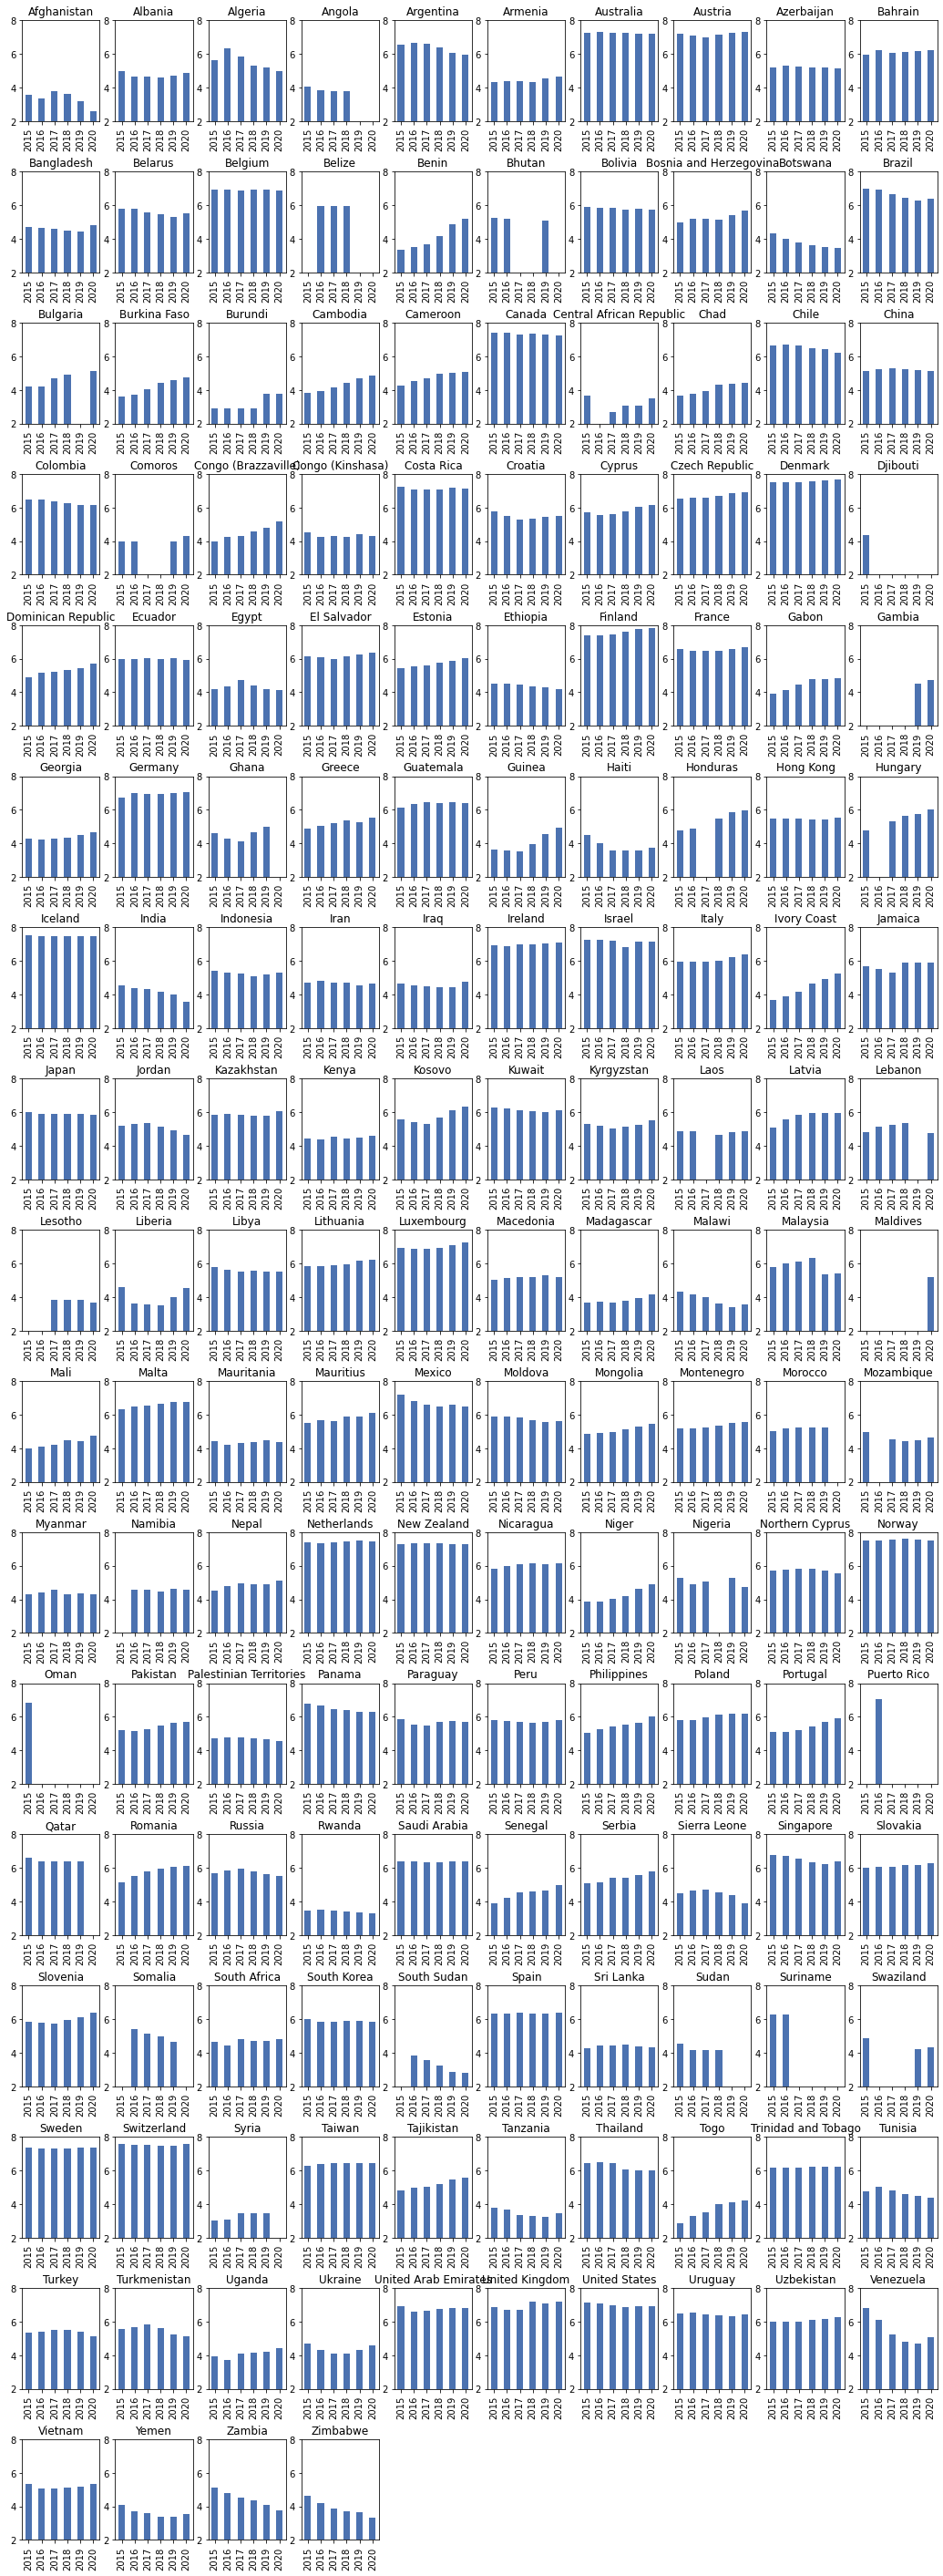

In [ ]:
plt.figure(figsize=(18,60))
sns.set_palette("deep")
df_by_countries=df_by_countries.sort_values(by="Country")

for i in range(len(df_by_countries)):
    plt.subplot(20,10,i+1)
    plt.ylim(2,8)
    plt.subplots_adjust(hspace=0.5)
    plt.title(df_by_countries.Country[i])
    df_by_countries.drop(["Change 2015-2020", "Country"],axis=1).iloc[i].plot.bar()

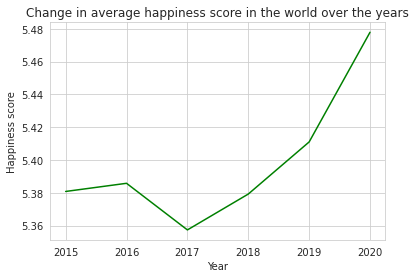

In [ ]:
yearly_averages=df_by_countries.drop(columns=["Change 2015-2020"]).mean()
sns.set_style("whitegrid")
sns.lineplot(data=yearly_averages,color="green")
plt.xlabel("Year")
plt.ylabel("Happiness score")
plt.title("Change in average happiness score in the world over the years")
plt.show()

We can see that the average happiness score has improved over the years overall quite obviously.

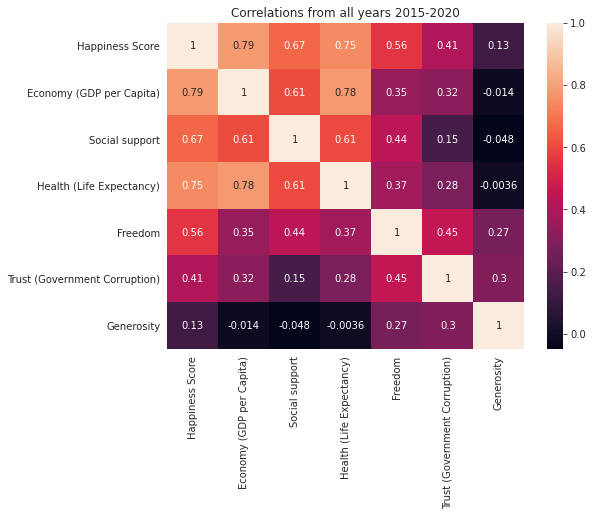

In [ ]:
correlations=data_all.drop(columns=["Year","Happiness Rank"]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True)
plt.title("Correlations from all years 2015-2020")
plt.show()

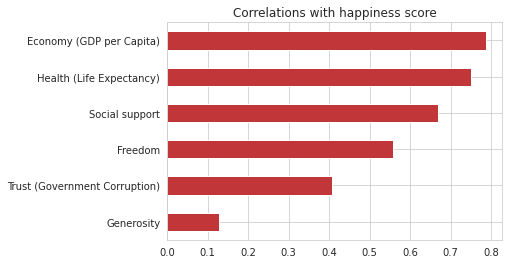

In [ ]:
sns.set_palette("RdBu")
correlations["Happiness Score"].drop(["Happiness Score"]).sort_values(ascending=True).plot.barh()
plt.title("Correlations with happiness score")
plt.show()

We can see that  economy, health and social support have the biggest correlations with happiness.

## Predicting

We will be trying to predict the happiness scores for the year 2020 based on the scores from years 2015-2019.

Let's predict the happiest country of the test set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data=data.dropna()

In [ ]:
x = data.loc[:, data.columns != 'Happiness Score']

y = data['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
X_trainCorrect = X_train.drop(['Country', 'Happiness Rank', 'Year'], axis = 1)

rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=0).fit(X_trainCorrect, y_train)

dt = DecisionTreeRegressor(criterion='mse', random_state=0).fit(X_trainCorrect, y_train)

svm_poly = SVR(kernel='poly', gamma='scale').fit(X_trainCorrect, y_train)

svm_rbf = SVR(kernel='rbf', gamma='scale').fit(X_trainCorrect, y_train)

Now let's see if these results make any sense!

In [ ]:
#countries = x['country_code'].tolist()
countries = X_test['Country'].tolist()
#print(countries)
#print(x['Country'].tolist())


#RANDOMFORESTREGRESSOR

rfPred = rf.predict(X_test.drop(['Country', 'Happiness Rank', 'Year'], axis=1))

dictRF = {}
for i in range(len(rfPred)):
  dictRF[countries[i]] = rfPred[i]
listRF = sorted(dictRF.items(), key=lambda x: x[1], reverse=True)

#DECISIONTREEREGRESSOR

dtPred = dt.predict(X_test.drop(['Country', 'Happiness Rank', 'Year'], axis=1))
dictDT = {}
for i in range(len(dtPred)):
  dictDT[countries[i]] = dtPred[i]
#print("DT", sorted(dictDT.items(), key=lambda x: x[1], reverse=True))
listDT = sorted(dictDT.items(), key=lambda x: x[1], reverse=True)

#SVMPOLYREGRESSOR

svmpolyPred = svm_poly.predict(X_test.drop(['Country', 'Happiness Rank', 'Year'], axis=1))
dictSVMPOLY = {}
for i in range(len(svmpolyPred)):
  dictSVMPOLY[countries[i]] = svmpolyPred[i]
#print("SVMp", sorted(dictSVMPOLY.items(), key=lambda x: x[1], reverse=True))
listSVMp = sorted(dictSVMPOLY.items(), key=lambda x: x[1], reverse=True)

#SVMRBFREGRESSOR

svmrbfPred = svm_rbf.predict(X_test.drop(['Country', 'Happiness Rank', 'Year'], axis=1))
dictSVMRBF = {}
for i in range(len(rfPred)):
  dictSVMRBF[countries[i]] = svmrbfPred[i]
#print("SVMr", sorted(dictSVMRBF.items(), key=lambda x: x[1], reverse=True))
listSVMr = sorted(dictSVMRBF.items(), key=lambda x: x[1], reverse=True)

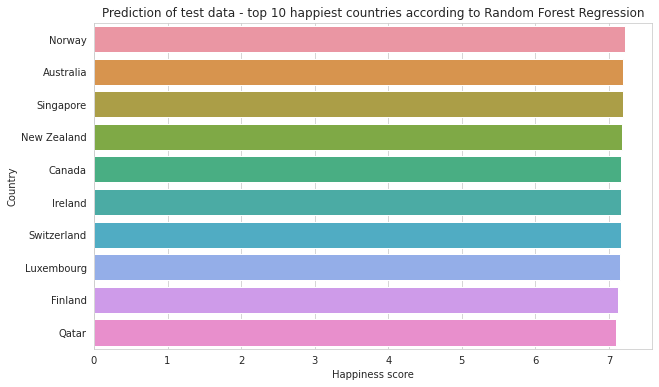

In [ ]:
#plt.bar([d[1] for d in listRF[:10]], [d[0] for d in listRF[:10]])
#plt.show()
figure = plt.figure(figsize=(10,6))
sns.barplot(y=[d[0] for d in listRF[:10]], x=[d[1] for d in listRF[:10]])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Prediction of test data - top 10 happiest countries according to Random Forest Regression')
plt.show()

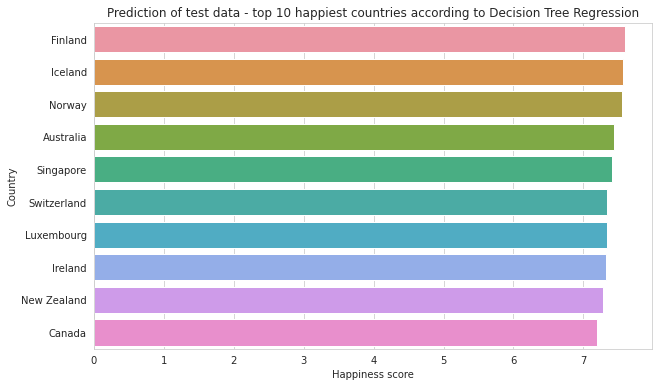

In [ ]:
figure = plt.figure(figsize=(10,6))
sns.barplot(y=[d[0] for d in listDT[:10]], x=[d[1] for d in listDT[:10]])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Prediction of test data - top 10 happiest countries according to Decision Tree Regression')
plt.show()

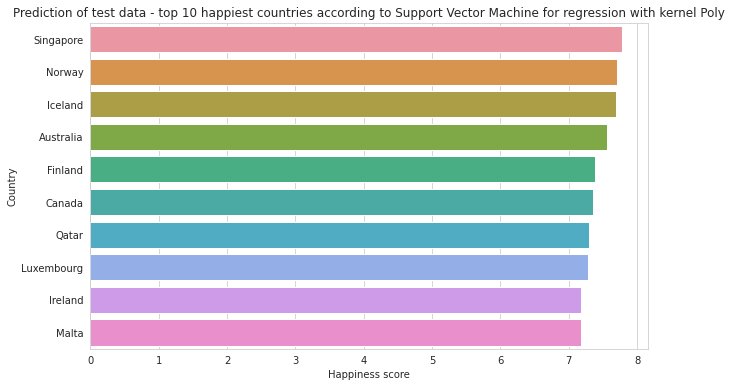

In [ ]:
figure = plt.figure(figsize=(10,6))
sns.barplot(y=[d[0] for d in listSVMp[:10]], x=[d[1] for d in listSVMp[:10]])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Prediction of test data - top 10 happiest countries according to Support Vector Machine for regression with kernel Poly')
plt.show()

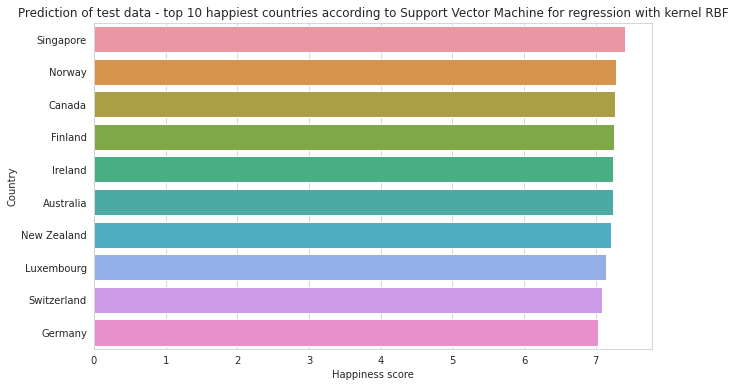

In [ ]:
figure = plt.figure(figsize=(10,6))
sns.barplot(y=[d[0] for d in listSVMr[:10]], x=[d[1] for d in listSVMr[:10]])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Prediction of test data - top 10 happiest countries according to Support Vector Machine for regression with kernel RBF')
plt.show()

### Result of 2020 predictions

Collectively, we decided to use Decision Tree Regression to predict the happiest countries of 2020.

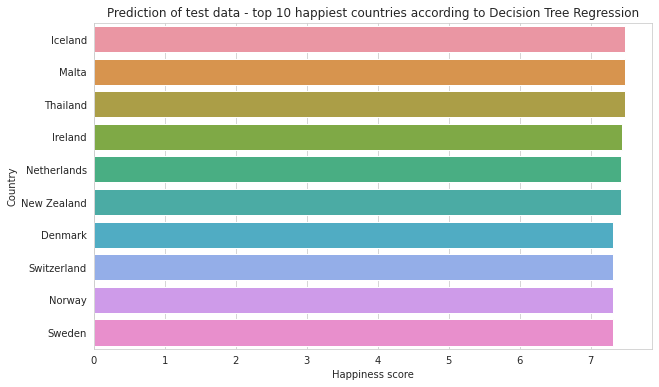

In [ ]:
countries = try2020['Country'].tolist()
x = try2020.drop(['Country', 'Happiness Score', 'Year'], axis = 1)
dtPred = dt.predict(x)
dictDT = {}
for i in range(len(dtPred)):
  dictDT[countries[i]] = dtPred[i]
#print("DT", sorted(dictDT.items(), key=lambda x: x[1], reverse=True))
listDT = sorted(dictDT.items(), key=lambda x: x[1], reverse=True)

figure = plt.figure(figsize=(10,6))
sns.barplot(y=[d[0] for d in listDT[:10]], x=[d[1] for d in listDT[:10]])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Prediction of test data - top 10 happiest countries according to Decision Tree Regression')
plt.show()


Let's compare the results to the actual happiness scores of 2020.

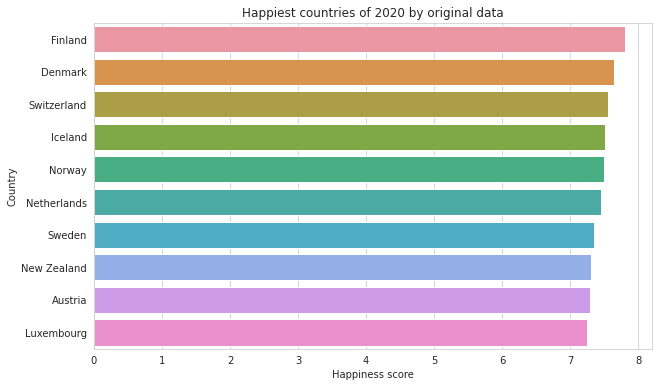

In [ ]:
Happiness2020 = try2020.sort_values(by='Happiness Score', ascending=False)[:10]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness2020.Country, x=Happiness2020["Happiness Score"])
plt.xticks()
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Happiest countries of 2020 by original data')
plt.show()

As we can see, the top 1 of the actual data is not even represented in our predicted top 10. However for the most part, the top 10 contains fairly similar countries. There are some countries like Malta, Thailand and Ireland that have not previously been represented in the top 10, but were predicted to be in the top 10 by our machine.

## Correlation between internet usage and happiness score

We have data about internet usage in the world from 2018. Let's clean it.

In [ ]:
internet = pd.read_csv("List of Countries by number of Internet Users - Sheet1.csv")
internet

,Country or Area,Internet Users,Population,Rank,Percentage,Rank.1
0,China,"765,367,947","1,409,517,397",1,54.30%,116
1,India,"461,347,554","1,339,180,127",2,34.45%,145
2,United States,"244,090,854","324,459,463",3,75.23%,68
3,Brazil,"141,206,801","209,288,278",4,67.47%,83
4,Japan,"115,845,120","127,484,450",5,90.87%,23
...,...,...,...,...,...,...
210,Falkland Islands,"2,881","2,910",211,99.02% (2016),-
211,Montserrat,"2,833","5,177",212,54.55% (2013),115
212,Wallis and Futuna,"1,383","11,773",213,8.95% (2012),-
213,Niue,"1,034","1,618",214,86.90% (2013),30


In [ ]:
for i in range(len(internet["Internet Users"])):
  internet["Internet Users"][i] = int(internet["Internet Users"][i].replace(",", ""))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(len(internet["Population"])):
  internet["Population"][i] = int(internet["Population"][i].replace(",", ""))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(len(internet["Rank.1"])):
  if "-" in internet["Rank.1"][i]:
    internet["Rank.1"][i] = np.nan
  else:
    internet["Rank.1"][i] = int(internet["Rank.1"][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i in range(len(internet["Percentage"])):
  if "(" in internet["Percentage"][i]:
    internet["Percentage"][i] = np.nan
  else:
    internet["Percentage"][i] = float(internet["Percentage"][i].replace("%", ""))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
internet = internet.dropna()
internet

,Country or Area,Internet Users,Population,Rank,Percentage,Rank.1
0,China,765367947,1409517397,1,54.3,116
1,India,461347554,1339180127,2,34.45,145
2,United States,244090854,324459463,3,75.23,68
3,Brazil,141206801,209288278,4,67.47,83
4,Japan,115845120,127484450,5,90.87,23
...,...,...,...,...,...,...
202,Marshall Islands,20560,53127,203,38.7,138
203,San Marino,20100,33400,204,60.18,102
204,Kiribati,16971,116398,205,14.58,185
207,Nauru,6475,11359,208,57,110


Now let's remove countries that are not in any of the previous datasets.

In [ ]:
count = 0
for c in internet["Country or Area"]:
  if c not in all_countries:
    internet.loc[internet["Country or Area"] == c] = np.nan
    count += 1
count

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


47

In [ ]:
internet = internet.dropna()

In [ ]:
internet

,Country or Area,Internet Users,Population,Rank,Percentage,Rank.1
0,China,765367947,1409517397,1.0,54.3,116
1,India,461347554,1339180127,2.0,34.45,145
2,United States,244090854,324459463,3.0,75.23,68
3,Brazil,141206801,209288278,4.0,67.47,83
4,Japan,115845120,127484450,5.0,90.87,23
...,...,...,...,...,...,...
167,Suriname,275785,563402,168.0,48.95,126
168,Maldives,275717,436330,169.0,63.19,95
172,Central African Republic,202204,4659080,173.0,4.34,206
173,Belize,176400,374681,174.0,47.08,131


Check whether there are countries in 2018 happiness dataset but not in the internet usage dataset.

In [ ]:
hap2018_countries = try2018["Country"].tolist()
int2018_countries = internet["Country or Area"].tolist()
print([x for x in hap2018_countries if x not in int2018_countries])

['Trinidad & Tobago', 'Northern Cyprus', 'Kosovo', 'Palestinian Territories', 'Congo (Brazzaville)', 'Congo (Kinshasa)']


We will remove those as well, and check that the countries are the same.

In [ ]:
for el in [x for x in hap2018_countries if x not in int2018_countries]:
  hap2018_countries.remove(el)

In [ ]:
hap2018_countries.sort() == int2018_countries.sort()

True

Now for later comfort, let's create a dictionary with each country's internet usage percent and happines score.

In [ ]:
dict_net_hap = {}
for el in hap2018_countries:
  dict_net_hap[el] = (internet["Percentage"][internet["Country or Area"] == el].values[0], try2018["Happiness Score"][try2018["Country"] == el].values[0])
dict_net_hap

{'Afghanistan': (11.45, 3.6319999999999997),
 'Albania': (71.85, 4.586),
 'Algeria': (47.69, 5.295),
 'Angola': (14.34, 3.795),
 'Argentina': (75.81, 6.388),
 'Armenia': (69.72, 4.321000000000001),
 'Australia': (86.54, 7.272),
 'Austria': (87.94, 7.138999999999999),
 'Azerbaijan': (79.0, 5.2010000000000005),
 'Bahrain': (95.88, 6.105),
 'Bangladesh': (18.02, 4.5),
 'Belarus': (74.44, 5.483),
 'Belgium': (87.68, 6.9270000000000005),
 'Belize': (47.08, 5.956),
 'Benin': (14.12, 4.141),
 'Bhutan': (48.11, 5.082),
 'Bolivia': (43.83, 5.752000000000001),
 'Bosnia and Herzegovina': (69.49, 5.129),
 'Botswana': (41.41, 3.59),
 'Brazil': (67.47, 6.419),
 'Bulgaria': (63.41, 4.933),
 'Burkina Faso': (15.88, 4.4239999999999995),
 'Burundi': (5.59, 2.905),
 'Cambodia': (34.0, 4.433),
 'Cameroon': (23.2, 4.975),
 'Canada': (92.7, 7.327999999999999),
 'Central African Republic': (4.34, 3.083),
 'Chad': (6.5, 4.301),
 'Chile': (82.33, 6.476),
 'China': (54.3, 5.246),
 'Colombia': (62.26, 6.26),
 'C

To see whether there seems to be a correlation we will plot the internet usage percentage with happiness score times 10 (for better reading).

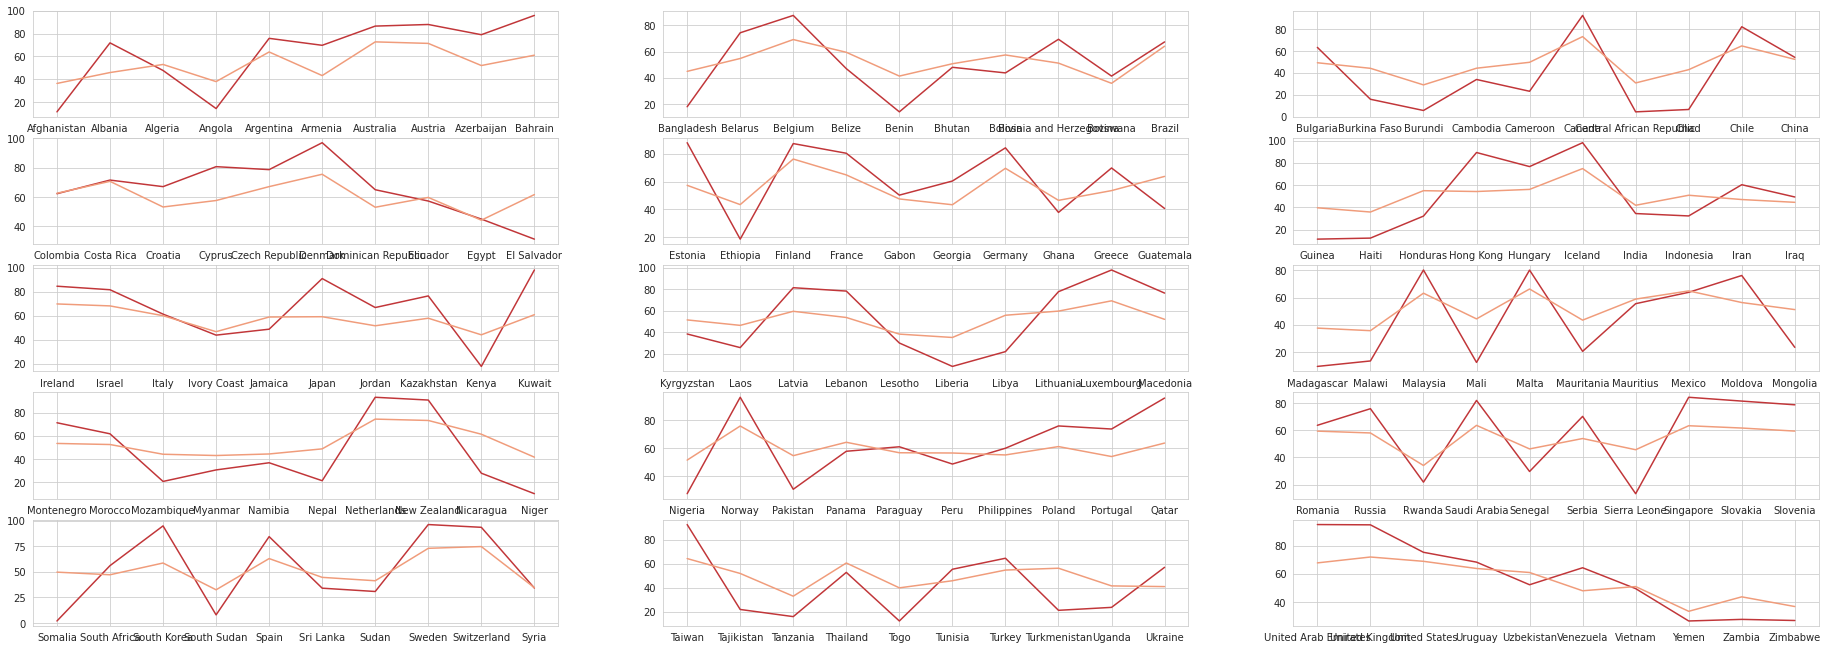

In [ ]:
#plt.plot([x for x in dict_net_hap.keys()], [dict_net_hap[x][1] for x in dict_net_hap])
#plt.plot([x for x in dict_net_hap.keys()], [dict_net_hap[x][0] for x in dict_net_hap])
riigid = [x for x in dict_net_hap.keys()]
ixx = 1
plt.figure(figsize=(32, 16))
for i in range(len(riigid)):
  if i % 10 == 0:
    #print(riigid[i : i + 10])
    plt.subplot(7, 3, ixx)
    plt.plot(riigid[i : i + 10], [dict_net_hap[x][0] for x in riigid[i : i + 10]])
    plt.plot(riigid[i : i + 10], [dict_net_hap[x][1]*10 for x in riigid[i : i + 10]])
    ixx += 1
plt.show()


As there seems to be some correlation we will calculate it.

In [ ]:
from scipy.stats import pearsonr
corr_P = pearsonr([dict_net_hap[x][0] for x in dict_net_hap], [dict_net_hap[x][1] for x in dict_net_hap])[0]
print("Pearson:", corr_P)

Pearson: 0.8004733546083322


In [ ]:
from scipy.stats import spearmanr
corr_S = spearmanr([dict_net_hap[x][0] for x in dict_net_hap], [dict_net_hap[x][1] for x in dict_net_hap])[0]
print("Spearman:", corr_S)

Spearman: 0.8042722088638622


Let us also make a scatterplot based on the information we stored earlier in the dictionary.

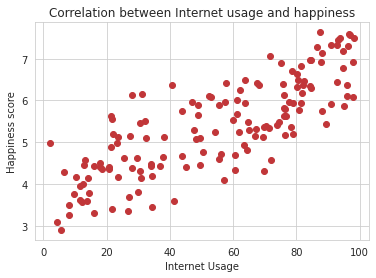

In [ ]:
plt.scatter([dict_net_hap[x][0] for x in dict_net_hap], [dict_net_hap[x][1] for x in dict_net_hap])
plt.xlabel('Internet Usage')
plt.ylabel('Happiness score')
plt.title('Correlation between Internet usage and happiness')
plt.show()

We can see that both the Pearson and Spearman correlations are 0.80, which is a pretty good linear correlation. This is statistically a strong correlation (over 0.7), but it does not imply causation. The correlation is probably caused by the fact that wealthier countries have more internet users and also a higher happiness score as GDP is strongly correlated with happiness score.